<a href="https://colab.research.google.com/github/Khadeja29/cs-412-Machine-Learning-Real-Estate-Regression/blob/main/KHADEJAIQBAL_26242_ML202102_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 412 Machine Learning 2020 

# Assignment 2/Q1

## Task

Implement a Simple Regression and Polynomial Regression
models to predict real estate prices using the scikit-learn library.


## Dataset

[**Real estate price prediction** ](https://www.kaggle.com/quantbruce/real-estate-price-prediction)






# 1) Initialize

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2) Load Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns

real_estate_df = pd.read_csv('/content/drive/MyDrive/Real estate.csv')

In [ ]:
real_estate_df.tail(5)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


# 3) Understand the dataset


In [ ]:
print("Shape of the data set is: ", real_estate_df.shape)

Shape of the data set is:  (414, 8)


In [ ]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# 4) Define the predictor features and response 

In [ ]:
real_estate_df = real_estate_df.drop(columns=['No'])
real_estate_df.tail(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [ ]:
Y= real_estate_df.pop("Y house price of unit area")


In [ ]:
real_estate_df.tail(5)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
409,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,2012.667,5.6,90.45606,9,24.97433,121.54310
411,2013.250,18.8,390.96960,7,24.97923,121.53986
412,2013.000,8.1,104.81010,5,24.96674,121.54067
413,2013.500,6.5,90.45606,9,24.97433,121.54310


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_np = sc.fit_transform(real_estate_df)
X = pd.DataFrame(X_np, columns=['X1 transaction date','X2 house age',	'X3 distance to the nearest MRT station','X4 number of convenience stores',	'X5 latitude'	,'X6 longitude'])
X.tail()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
409,-0.528967,-0.352637,2.378365,-1.391638,-2.216993,-1.927835
410,-1.711384,-1.064493,-0.788071,1.667503,0.427579,0.635341
411,0.358734,0.095568,-0.549678,0.987694,0.822893,0.423972
412,-0.528967,-0.844784,-0.776684,0.307885,-0.184755,0.476814
413,1.246435,-0.985398,-0.788071,1.667503,0.427579,0.635341


# 5) Define the predictor features and response 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_tr, X_test, y_tr, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

print("Full train data shape:", X_tr.shape, "Full train label shape:", y_tr.shape, "Test data shape:", X_test.shape, "Test label shape:", y_test.shape)

Full train data shape: (351, 6) Full train label shape: (351,) Test data shape: (63, 6) Test label shape: (63,)


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.15, random_state=42)
print("Train data shape:", X_train.shape, "Train label shape:", y_train.shape, "Validation data shape:", X_valid.shape, "Validation label shape:", y_valid.shape)

Train data shape: (298, 6) Train label shape: (298,) Validation data shape: (53, 6) Validation label shape: (53,)


# 6) Training the model and hyperparameter tunning

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
pvalues=[1,2,3,4,5]
train_mse=[]
val_mse=[]
train_time=[]
pred_time=[]
for p in pvalues:
  poly_reg = PolynomialFeatures(degree=p)
  X_poly_train = poly_reg.fit_transform(X_train)
  lin_reg = LinearRegression()
  start_time = time.time()
  lin_reg.fit(X_poly_train, y_train)
  train_time.append(time.time()-start_time)

  start_time = time.time()
  y_pred = lin_reg.predict(X_poly_train)
  pred_time.append(time.time()-start_time)

  m=mean_squared_error(y_train, y_pred)
  print("The train mean squared error for p=",p,"is",m )
  train_mse.append(m)

  X_poly_valid = poly_reg.transform(X_valid)
  y_pred2 = lin_reg.predict(X_poly_valid)

  v_mse = mean_squared_error(y_valid, y_pred2)
  print("The validation mean squared error for p=",p ,"is",v_mse )
  val_mse.append(v_mse)

  print("-----------------------------------------------")



print(pred_time)
print(train_time)



The train mean squared error for p= 1 is 85.41822207633554
The validation mean squared error for p= 1 is 53.64129753943406
-----------------------------------------------
The train mean squared error for p= 2 is 57.012942794551805
The validation mean squared error for p= 2 is 54.48243563365311
-----------------------------------------------
The train mean squared error for p= 3 is 42.34810514192914
The validation mean squared error for p= 3 is 46.050846489475504
-----------------------------------------------
The train mean squared error for p= 4 is 19.61126690598942
The validation mean squared error for p= 4 is 2876.3278698491144
-----------------------------------------------
The train mean squared error for p= 5 is 0.028070469798657762
The validation mean squared error for p= 5 is 1574066.4430199887
-----------------------------------------------
[0.00012373924255371094, 0.00014662742614746094, 0.00448155403137207, 0.0010476112365722656, 0.0011832714080810547]
[0.0007634162902832031

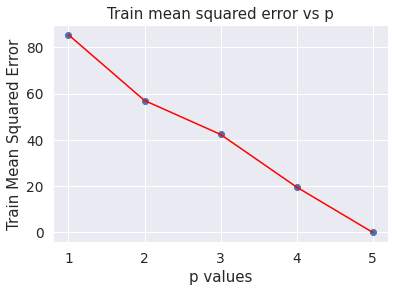

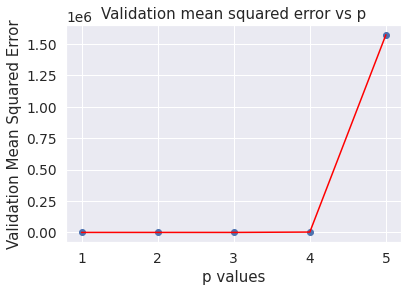

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(pvalues, train_mse)
plt.ylabel("Train Mean Squared Error")
plt.xlabel("p values")
plt.title("Train mean squared error vs p")
plt.plot(pvalues, train_mse, 'red')

plt.figure(figsize=(6,4))
plt.scatter(pvalues, val_mse)
plt.ylabel("Validation Mean Squared Error")
plt.xlabel("p values")
plt.title("Validation mean squared error vs p")
plt.plot(pvalues, val_mse, 'red')



In [ ]:
min_val_error= min(val_mse)
min_at_index= val_mse.index(min_val_error)
min_p = min_at_index+1

print("The minimum mean squared error for validation data is",min_val_error,"for p=",min_p)


The minimum mean squared error for validation data is 46.050846489475504 for p= 3


# 7) Final model and Testing

In [ ]:
poly_reg_3 = PolynomialFeatures(degree=3)
X_poly_train = poly_reg_3.fit_transform(X_train)

X_poly_train.shape

(298, 84)

In [ ]:
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X_poly_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lin_reg_3.predict(X_poly_train)

print('Bias:', lin_reg_3.intercept_)
print("Train Mean squared error: %.2f"
      % mean_squared_error(y_train, y_pred))

Bias: 29.52457324208673
Train Mean squared error: 42.35


In [ ]:
X_poly_valid = poly_reg_3.transform(X_valid)
X_poly_valid.shape

(53, 84)

In [ ]:
y_pred = lin_reg_3.predict(X_poly_valid)

lr3_mse = mean_squared_error(y_valid, y_pred)

print("Valid Mean squared error: %.2f"
      % lr3_mse)

Valid Mean squared error: 46.05


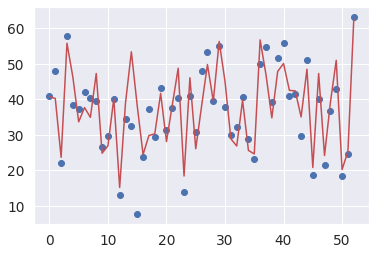

In [ ]:
xaxis = np.arange(y_valid.shape[0])
plt.scatter(xaxis,y_valid)
plt.plot(xaxis,y_pred, 'r')

In [ ]:
X_poly_test = poly_reg_3.transform(X_test)
X_poly_test.shape

(63, 84)

In [ ]:
y_pred = lin_reg_3.predict(X_poly_test)

print("Test Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Test Mean squared error: 52.89


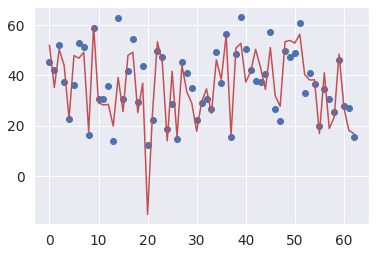

In [ ]:
xaxis = np.arange(y_test.shape[0])
plt.scatter(xaxis,y_test)
plt.plot(xaxis,y_pred, 'r')

covariance matrix of the dataset

In [ ]:
real_estate_df = pd.read_csv('/content/drive/MyDrive/Real estate.csv')
real_estate_df.pop('No')
x= pd.DataFrame.cov(real_estate_df)
x

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,0.079506,0.056372,2.166557e+01,0.008003,0.000123,-0.000178,0.335665
X2 house age,0.056372,129.788704,3.684082e+02,1.664189,0.007694,-0.008483,-32.640356
X3 distance to the nearest MRT station,21.665566,368.408249,1.592921e+06,-2239.938319,-9.257892,-15.618216,-11567.871845
X4 number of convenience stores,0.008003,1.664189,-2.239938e+03,8.676334,0.016236,0.020302,22.885163
X5 latitude,0.000123,0.007694,-9.257892e+00,0.016236,0.000154,0.000079,0.092249
X6 longitude,-0.000178,-0.008483,-1.561822e+01,0.020302,0.000079,0.000236,0.109273
Y house price of unit area,0.335665,-32.640356,-1.156787e+04,22.885163,0.092249,0.109273,185.136507


In [ ]:
real_estate_df = pd.read_csv('/content/drive/MyDrive/Real estate.csv')
real_estate_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Covariance Matrix Showing Correlation Coefficients between Features

<Figure size 432x288 with 0 Axes>

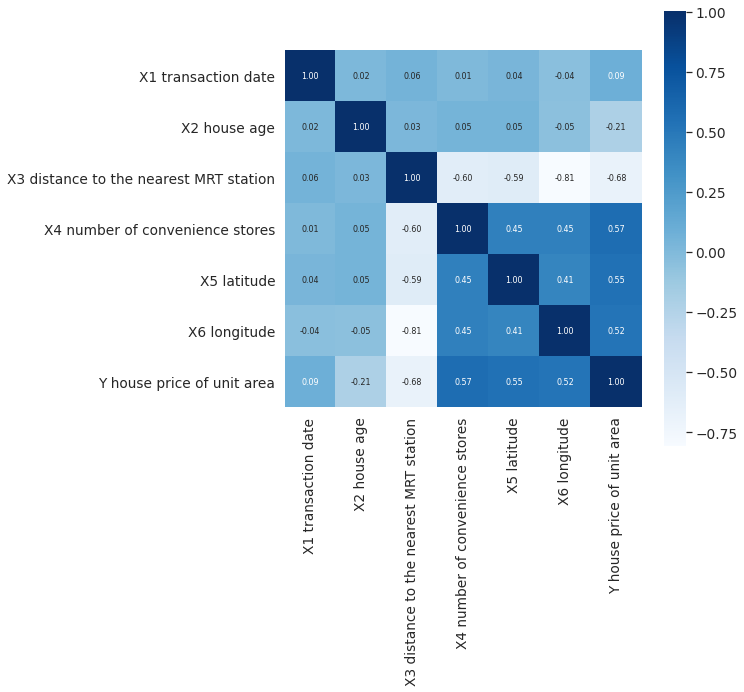

In [ ]:
cols = np.array(real_estate_df.drop(columns=['No']).columns)

from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_sc = sc.fit_transform(real_estate_df[cols].iloc[:,range(0,7)].values)

cov_mat=np.cov(X_sc.T)
plt.tight_layout()
plt.figure(figsize=(8,8))
sns.set(font_scale=1.25)
heatmap= sns.heatmap(cov_mat, 
                     annot= True, 
                     square=True, 
                     fmt='.2f',
                     annot_kws={'size':8},
                     cmap ='Blues',
                     yticklabels =cols,
                     xticklabels=cols)
plt.show()


 discard d
columns from the predictor features. Notice here that d is another hyperparameter.
Use the optimal value of p you found in part a, and draw on a figure the mean
squared training and validation error curves as a function of d for d = 0, 1, 2, 3.
What is the optimal value of d? Which features are discarded? Justify your reasoning.

### d=0

Keeping all features

In [ ]:
real_estate_df = pd.read_csv('/content/drive/MyDrive/Real estate.csv')
real_estate_df.pop('No')
real_estate_df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
Y= real_estate_df.pop("Y house price of unit area")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_np = sc.fit_transform(real_estate_df)
X = pd.DataFrame(X_np, columns=['X1 transaction date','X2 house age',	'X3 distance to the nearest MRT station','X4 number of convenience stores',	'X5 latitude'	,'X6 longitude'])
#X.tail()

from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print("Full train data shape:", X_tr.shape, "Full train label shape:", y_tr.shape, "Test data shape:", X_test.shape, "Test label shape:", y_test.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.15, random_state=42)
print("Train data shape:", X_train.shape, "Train label shape:", y_train.shape, "Validation data shape:", X_valid.shape, "Validation label shape:", y_valid.shape)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error


poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
start_time = time.time()
lin_reg.fit(X_poly_train, y_train)
print("Time for the training: %.4f secs" % (time.time()-start_time))

start_time_acc = time.time()
y_pred = lin_reg.predict(X_poly_train)
print("Time for the prediction: %.4f secs" % (time.time()-start_time_acc))

m=mean_squared_error(y_train, y_pred)
print("The train mean squared error for p=3 is",m )


X_poly_valid = poly_reg.transform(X_valid)
y_pred2 = lin_reg.predict(X_poly_valid)

v_mse = mean_squared_error(y_valid, y_pred2)
print("The validation mean squared error for p=3 is",v_mse )


#test
X_poly_test = poly_reg.transform(X_test)
#X_poly_test.shape

y_pred = lin_reg.predict(X_poly_test)

print("Test Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))



Full train data shape: (351, 6) Full train label shape: (351,) Test data shape: (63, 6) Test label shape: (63,)
Train data shape: (298, 6) Train label shape: (298,) Validation data shape: (53, 6) Validation label shape: (53,)
Time for the training: 0.0049 secs
Time for the prediction: 0.0005 secs
The train mean squared error for p=3 is 42.34810514192914
The validation mean squared error for p=3 is 46.050846489475504
Test Mean squared error: 52.89


### d=1





In [ ]:
real_estate_df = pd.read_csv('/content/drive/MyDrive/Real estate.csv')
real_estate_df.pop('No')
real_estate_df.pop('X1 transaction date')
real_estate_df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
Y= real_estate_df.pop("Y house price of unit area")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_np = sc.fit_transform(real_estate_df)
X = pd.DataFrame(X_np, columns=['X1 transaction date','X2 house age','X4 number of convenience stores',	'X5 latitude'	,'X6 longitude'])
#X.tail()

from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print("Full train data shape:", X_tr.shape, "Full train label shape:", y_tr.shape, "Test data shape:", X_test.shape, "Test label shape:", y_test.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.15, random_state=42)
print("Train data shape:", X_train.shape, "Train label shape:", y_train.shape, "Validation data shape:", X_valid.shape, "Validation label shape:", y_valid.shape)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error


poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
start_time = time.time()
lin_reg.fit(X_poly_train, y_train)
print("Time for the training: %.4f secs" % (time.time()-start_time))

start_time_acc = time.time()
y_pred = lin_reg.predict(X_poly_train)
print("Time for the prediction: %.4f secs" % (time.time()-start_time_acc))
m=mean_squared_error(y_train, y_pred)
print("The train mean squared error for p=3 is",m )


X_poly_valid = poly_reg.transform(X_valid)
y_pred2 = lin_reg.predict(X_poly_valid)

v_mse = mean_squared_error(y_valid, y_pred2)
print("The validation mean squared error for p=3 is",v_mse )


#test
X_poly_test = poly_reg.transform(X_test)
#X_poly_test.shape

y_pred = lin_reg.predict(X_poly_test)

print("Test Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))



Full train data shape: (351, 5) Full train label shape: (351,) Test data shape: (63, 5) Test label shape: (63,)
Train data shape: (298, 5) Train label shape: (298,) Validation data shape: (53, 5) Validation label shape: (53,)
Time for the training: 0.0054 secs
Time for the prediction: 0.0045 secs
The train mean squared error for p=3 is 48.08563134389236
The validation mean squared error for p=3 is 51.8383185443985
Test Mean squared error: 42.35


### d=2

In [ ]:
real_estate_df = pd.read_csv('/content/drive/MyDrive/Real estate.csv')
real_estate_df.pop('No')
real_estate_df.pop('X1 transaction date')
real_estate_df.pop('X2 house age')
real_estate_df.head()

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,84.87882,10,24.98298,121.54024,37.9
1,306.59470,9,24.98034,121.53951,42.2
2,561.98450,5,24.98746,121.54391,47.3
3,561.98450,5,24.98746,121.54391,54.8
4,390.56840,5,24.97937,121.54245,43.1


In [ ]:
Y= real_estate_df.pop("Y house price of unit area")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_np = sc.fit_transform(real_estate_df)
X = pd.DataFrame(X_np, columns=['X1 transaction date','X4 number of convenience stores',	'X5 latitude'	,'X6 longitude'])
#X.tail()

from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print("Full train data shape:", X_tr.shape, "Full train label shape:", y_tr.shape, "Test data shape:", X_test.shape, "Test label shape:", y_test.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.15, random_state=42)
print("Train data shape:", X_train.shape, "Train label shape:", y_train.shape, "Validation data shape:", X_valid.shape, "Validation label shape:", y_valid.shape)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error


poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
start_time = time.time()
lin_reg.fit(X_poly_train, y_train)
print("Time for the training: %.4f secs" % (time.time()-start_time))

start_time_acc = time.time()
y_pred = lin_reg.predict(X_poly_train)
print("Time for the prediction: %.4f secs" % (time.time()-start_time_acc))

m=mean_squared_error(y_train, y_pred)
print("The train mean squared error for p=3 is",m )


X_poly_valid = poly_reg.transform(X_valid)
y_pred2 = lin_reg.predict(X_poly_valid)

v_mse = mean_squared_error(y_valid, y_pred2)
print("The validation mean squared error for p=3 is",v_mse )


#test
X_poly_test = poly_reg.transform(X_test)
#X_poly_test.shape

y_pred = lin_reg.predict(X_poly_test)

print("Test Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))



Full train data shape: (351, 4) Full train label shape: (351,) Test data shape: (63, 4) Test label shape: (63,)
Train data shape: (298, 4) Train label shape: (298,) Validation data shape: (53, 4) Validation label shape: (53,)
Time for the training: 0.0064 secs
Time for the prediction: 0.0017 secs
The train mean squared error for p=3 is 60.45623034661365
The validation mean squared error for p=3 is 57.448897590010766
Test Mean squared error: 48.69


### d=3

In [ ]:
real_estate_df = pd.read_csv('/content/drive/MyDrive/Real estate.csv')
real_estate_df.pop('No')
real_estate_df.pop('X6 longitude')
real_estate_df.pop('X2 house age')
real_estate_df.pop('X1 transaction date')

real_estate_df.head()

,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,Y house price of unit area
0,84.87882,10,24.98298,37.9
1,306.59470,9,24.98034,42.2
2,561.98450,5,24.98746,47.3
3,561.98450,5,24.98746,54.8
4,390.56840,5,24.97937,43.1


In [ ]:
Y= real_estate_df.pop("Y house price of unit area")
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_np = sc.fit_transform(real_estate_df)
X = pd.DataFrame(X_np, columns=['X4 number of convenience stores',	'X5 latitude'	,'X6 longitude'])
#X.tail()

from sklearn.model_selection import train_test_split

X_tr, X_test, y_tr, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
print("Full train data shape:", X_tr.shape, "Full train label shape:", y_tr.shape, "Test data shape:", X_test.shape, "Test label shape:", y_test.shape)

X_train, X_valid, y_train, y_valid = train_test_split(X_tr, y_tr, test_size=0.15, random_state=42)
print("Train data shape:", X_train.shape, "Train label shape:", y_train.shape, "Validation data shape:", X_valid.shape, "Validation label shape:", y_valid.shape)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error


poly_reg = PolynomialFeatures(degree=3)
X_poly_train = poly_reg.fit_transform(X_train)
lin_reg = LinearRegression()
start_time_acc = time.time()
lin_reg.fit(X_poly_train, y_train)
print("Time for the training: %.4f secs" % (time.time()-start_time))
start_time_acc = time.time()
y_pred = lin_reg.predict(X_poly_train)
print("Time for prediction: %.4f secs" % (time.time()-start_time))


m=mean_squared_error(y_train, y_pred)
print("The train mean squared error for p=3 is",m )


X_poly_valid = poly_reg.transform(X_valid)
y_pred2 = lin_reg.predict(X_poly_valid)

v_mse = mean_squared_error(y_valid, y_pred2)
print("The validation mean squared error for p=3 is",v_mse )


#test
X_poly_test = poly_reg.transform(X_test)
#X_poly_test.shape

y_pred = lin_reg.predict(X_poly_test)

print("Test Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))



Full train data shape: (351, 3) Full train label shape: (351,) Test data shape: (63, 3) Test label shape: (63,)
Train data shape: (298, 3) Train label shape: (298,) Validation data shape: (53, 3) Validation label shape: (53,)
Time for the training: 0.1831 secs
Time for prediction: 0.1835 secs
The train mean squared error for p=3 is 67.85809584714261
The validation mean squared error for p=3 is 62.21456873328515
Test Mean squared error: 75.74


# 8) Notebook & Report



---
**Problem Definition:** The aim of this project is to build a model to  predict real estate prices using Machine Learning
approaches.Two of the following regression models are compared based on their performances :
1. Simple Regression 
2. Polynomial Regression
models

**Preprocessing:** The data had no null values in any columns.The irrelevant column `No` which would have a bad effect on the model was dropped.Then the label or target feature Y was removed from the dataset and the data was standardized before spilitting.
The standardized data was split into train, test and validation with a 70:15:15 split.

**HyperParameter Tunning:** 
The first hyperparamter to be considered was the p valve or the degree of the polynomial for the model.
Train and validation Mean squared Errors were experimented over different p values.According to the results for Train mean squared errors the MSE decresed as p value incresed however for validation score the minimum MSE was for p=3.The aim was to find the p value which gives the minimum MSE.
The values above p=3 gave a higher MSE probably because the model was overfitting and too complex.

The train mean squared error for p= 3 is 42.34810514192914

The validation mean squared error for p= 3 is 46.050846489475504

As the complexity of the model incearses i.e as p value increases the value increases the time from training and pediction also increased.

The second hyperparameter was d where a covariance matix was constructed to study which features/X's impact the prediction of Y more.The ones that closest to zero were one by one removed from the data base to check the perfromace in order.
d=0 no Xi column was removed where i=1,...,6

d=1,  X1

d=2, X1 and X=2

d=3, X=6 X=2 X=1

are removed in order of increasing value of correlation or covariance.

The best performace from test,train and validation were all observed when p=3 and d=3.

The train mean squared error for p=3 is 67.85809584714261

The validation mean squared error for p=3 is 62.21456873328515

Test Mean squared error: 75.74




